# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

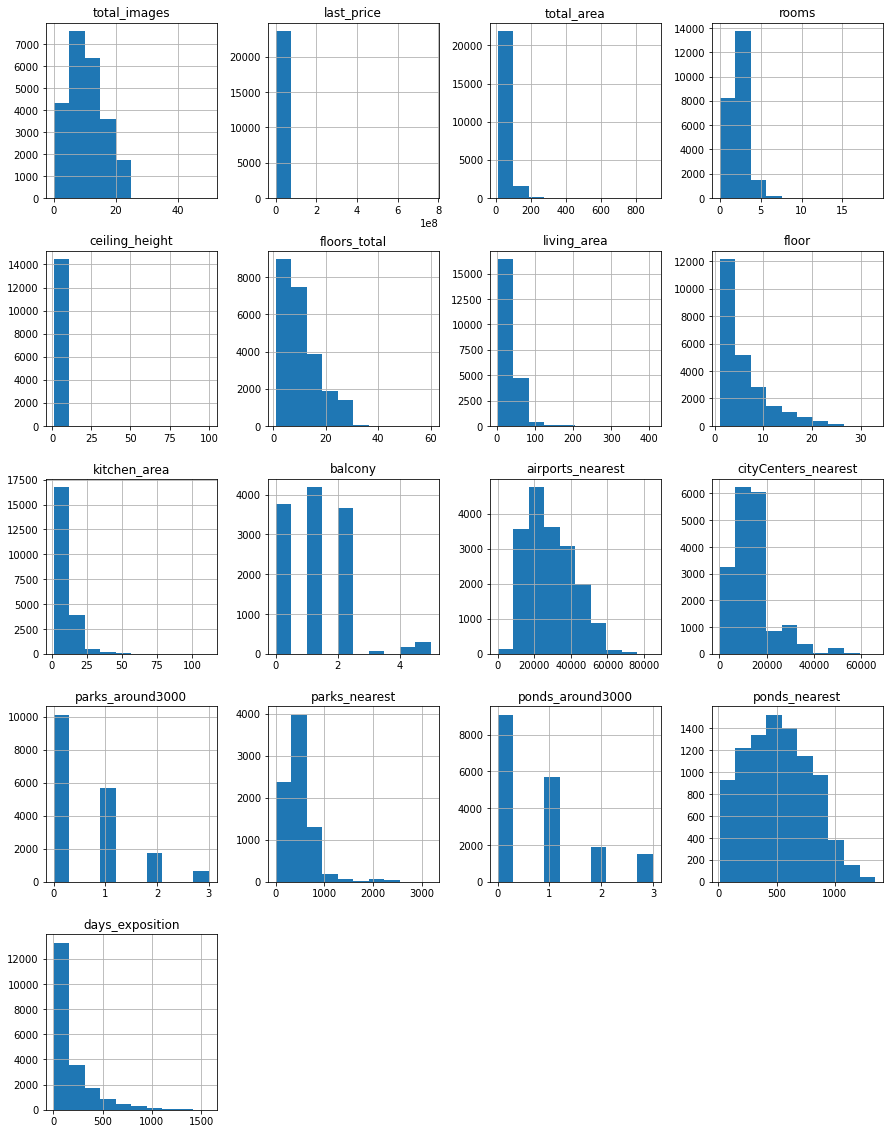

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.hist(figsize=(15, 20));


In [3]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2237,4,22932404.0,94.80,2015-10-11T00:00:00,2,3.00,9.0,53.30,3,NaN,False,False,17.20,1.0,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,1095.0
22915,10,4350000.0,34.70,2018-07-20T00:00:00,1,2.77,10.0,17.45,5,NaN,False,False,9.00,1.0,Санкт-Петербург,22057.0,10647.0,2.0,37.0,0.0,NaN,36.0
10954,17,5200000.0,81.00,2017-01-09T00:00:00,3,NaN,9.0,57.60,6,NaN,False,False,8.10,0.0,Красное Село,25518.0,28943.0,0.0,NaN,0.0,NaN,135.0
15794,7,2180000.0,55.00,2018-08-07T00:00:00,2,NaN,5.0,28.00,1,NaN,False,False,9.00,NaN,Новая Ладога,NaN,NaN,NaN,NaN,NaN,NaN,160.0
777,16,18000000.0,100.00,2015-12-09T00:00:00,3,3.00,3.0,50.80,2,NaN,False,False,14.00,0.0,Сестрорецк,57815.0,34745.0,2.0,265.0,1.0,651.0,215.0
8051,12,5600000.0,63.06,2019-04-24T00:00:00,3,2.50,9.0,43.15,4,NaN,False,False,7.36,1.0,Санкт-Петербург,12640.0,12552.0,0.0,NaN,1.0,426.0,NaN
17348,2,3550000.0,45.00,2017-06-02T00:00:00,2,NaN,5.0,30.00,4,NaN,False,False,6.00,0.0,Санкт-Петербург,28596.0,7535.0,1.0,258.0,2.0,553.0,25.0
2286,11,3450000.0,44.00,2017-11-03T00:00:00,2,2.50,4.0,26.00,3,NaN,False,False,6.00,NaN,Колпино,27126.0,32913.0,0.0,NaN,1.0,593.0,349.0
22155,16,1850000.0,53.00,2017-08-03T00:00:00,3,NaN,5.0,36.00,4,NaN,False,False,6.00,NaN,Приозерск,NaN,NaN,NaN,NaN,NaN,NaN,323.0
3288,18,38500000.0,179.00,2017-11-03T00:00:00,4,3.00,10.0,97.00,10,NaN,False,False,38.00,NaN,Санкт-Петербург,25799.0,4593.0,0.0,NaN,2.0,840.0,143.0


Выводы:

Отсутствует много значений, нужно попробовать понять причины и устранить, где необходимо

### Предобработка данных

In [4]:
data.isnull().sum().sort_values()


total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [5]:
data = data.fillna({ 'is_apartment': '0', 'balcony': '0'})
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.isnull().sum().sort_values()

total_images                0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
ceiling_height              0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
parks_around3000         5518
ponds_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ponds_nearest           14589
parks_nearest           15620
dtype: int64

Как известно, в базе содержится два типа данных: добавленные пользователем и картографические. В данных есть пропуски, предположительные причины:
- locality_name — название населённого пункта
- floors_total — всего этажей в доме
- kitchen_area — площадь кухни
- living_area — жилая площадь
- ceiling_height — высота потолков

можно допустить, что пользователь не указал эту информацию

- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

нам известно, что данные из архива. Возможно, на момент его создания, объявление было ещё не снято

- parks_around3000 — число парков в радиусе 3 км
- ponds_around3000 — число водоёмов в радиусе 3 км

значение ноль обозначает, что ни парка, ни водоёма в радиусе 3км нет

- is_apartment — апартаменты
- balcony — число балконов

эти данные указывал пользователь и, скорее всего, пропуск обозначает, что балкона нет, или недвижимость не является аппартаментами, поэтому заменяем пропуски на 0
    

- ceiling_height — высота потолков

пользователь мог и не указать эти данные, заменяем на медианное значение



In [6]:
data.astype({ 'is_apartment': 'int64', 'studio': 'int64','open_plan':'int64'})
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Преобразовали тип данных в целочисленный. Для удобства работы и хранения, изменили формат времени в дате публикации

In [7]:
display(data['locality_name'].unique().tolist(), len(data['locality_name'].unique()))

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

365

Проверим на неявные дубликаты в названиях населённых пунктов, устраним

In [8]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
len(data['locality_name'].unique())

323

Посмотрим на распределение данных, найдём экстремальные значения, если они есть

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Поскольку мы анализируем объявления в городе Санкт-Петербург и области, и у нас нет данных по годам постройки, будем учитывать специфику старого фонда. Не секрет, что в городе много квартир - это перепланированные бывшие коммуналки, квартиры в домах дореволюционной постройки и прочая нестандартная недвижимость. Поэтому ориентироваться на строительные нормы и правила было бы не рационально.
В первую очередь выделяются значения в столбце со стоимостью: между средним и максимальным значением очень большая разница. Также виден большой разброс в значениях по площади. Минимальная стоимость квартиры в 12190 выглядит подозрительно. Но такие объявления вполне реальны. Например, причиной низкой стоимости может являться долг за коммунальные услуги. Максимальная стоимость 763 млн - выглядит вполне реально, квартира элитного класса в центре города с огромной площадью. 900-метровые квартиры также вполне реальная информация - на некоторых ресурсах сейчас можно увидеть такие объявления, с планом и фотографиями. Можно заметить, что общая площадь бывает заметно больше жилой. Объясняется это наличием балконов, террас, патио и прочих площадей.
Жилая площадь 2м выглядит неправдоподобно, даже учитывая все особенности. Потолки в 100м выглядят тоже неправдоподобно - скорее всего это ошибка в данных. Самый высокий этаж в объявлениях 33-й. Из открытых источников в интернете известно, что в Санкт-Петербурге есть жилые дома с этажностью 37, а самое высокое здание - 87 этажей.
Такие значения выделяются на общем фоне и встретить их большая редкость, но некоторые из них могут существенно повлиять на проводимый анализ. Обработаем данные.

In [10]:
old_data = data
display(data['last_price'].quantile(0.95)) #в 95% объявлений цена находится в пределах 15300000
display(data['total_area'].quantile(0.99)) #в 99% объявлений общая площадь находится в пределах 197 м²
display(data['rooms'].quantile(0.99)) #в 99% объявлений количество комнат не более 5-и
display(data['living_area'].quantile(0.99)) #в 99% объявлений общая площадь находится в пределах 120 м²

data['last_price'] = data.loc[data['last_price'] <=15300000, 'last_price']
data['rooms'] = data.loc[data['rooms'] <=5, 'rooms']
data['total_area'] = data.loc[data['total_area'] <=197, 'total_area']
data['living_area'] = data.loc[data['living_area'] <=120, 'living_area']
#отбросим топовые значения, чтобы сфокусировать внимание на основных значениях в объявлениях

data.loc[data['ceiling_height'] >=24, 'ceiling_height'] /= 10 #исправим ошибку в высоте потолков
data['ceiling_height'] = data.loc[data['ceiling_height'] >=2.4, 'ceiling_height'] #отфильтруем высоту потолков на более правдоподобне значение
data['living_area'] = data.loc[data['living_area'] >=8, 'living_area'] #отфильтруем минимальную жилую площадь на более правдоподобне значение

display(data.shape[0] / old_data.shape[0])

15300000.0

197.21400000000028

5.0

120.0

1.0

### Посчитаем и добавим в таблицу новые столбцы

Добавляем в таблицу новые столбцы:
- 'm_price' цена за квадратный метр
- 'day_of_week_exposition' день недели публикации объявления
- 'month_exposition' месяц публикации объявления
- 'year_exposition' год публикации объявления
- 'floor_type' тип этажа квартиры

Упорядочим столбцы в более логичную последовательность. 
Расстояние до центра города в километрах переводим из м в км и округляем до целых значений, выравниваем регистр.

In [11]:
data['m_price'] = data['last_price']/data['total_area']
data['m_price'] = data['m_price'].round(decimals=2)
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year
data['day_of_week_exposition'] = data['first_day_exposition'].dt.dayofweek

def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

data['city_сenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].round(0)
data.rename(columns = {'cityCenters_nearest':'city_сenters_nearest'}, inplace = True)

data = data[[
 'locality_name',
 'first_day_exposition',
 'last_price',
 'm_price',
 'total_area',
 'living_area',
 'rooms',
 'kitchen_area',
 'balcony',           
 'ceiling_height',
 'floors_total',
 'floor_type',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'airports_nearest',
 'city_сenters_nearest',
 'city_сenters_nearest_km',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition',
 'month_exposition',
 'year_exposition',
 'day_of_week_exposition',
 'total_images'
]]

display(data.sample(5))


,locality_name,first_day_exposition,last_price,m_price,total_area,living_area,rooms,kitchen_area,balcony,ceiling_height,floors_total,floor_type,floor,is_apartment,studio,open_plan,airports_nearest,city_сenters_nearest,city_сenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,month_exposition,year_exposition,day_of_week_exposition,total_images
17421,Санкт-Петербург,2019-02-13,NaN,NaN,95.80,59.50,3.0,16.40,1.0,2.80,25.0,другой,22,0,False,False,28116.0,11870.0,12.0,1.0,533.0,1.0,927.0,NaN,February,2019,2,17
3867,поселок Парголово,2017-12-05,3490000.0,97079.28,35.95,14.90,1.0,12.60,2.0,2.65,24.0,другой,11,0,False,False,53717.0,19894.0,20.0,0.0,NaN,0.0,NaN,142.0,December,2017,1,2
21420,поселок Первомайское,2018-12-26,2300000.0,61333.33,37.50,17.36,2.0,12.83,0,2.60,2.0,последний,2,0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,December,2018,2,8
22340,Пушкин,2018-02-04,6000000.0,80428.95,74.60,54.90,3.0,8.00,1.0,2.65,3.0,последний,3,0,False,False,17078.0,29231.0,29.0,1.0,488.0,3.0,578.0,NaN,February,2018,6,7
16701,Санкт-Петербург,2017-03-10,5150000.0,107291.67,48.00,27.40,2.0,7.20,2.0,2.60,9.0,другой,3,0,False,False,28813.0,6185.0,6.0,1.0,377.0,0.0,NaN,219.0,March,2017,4,7


### Проведём исследовательский анализ данных

count    23461.000000
mean        58.113848
std         26.362658
min         12.000000
25%         40.000000
50%         51.800000
75%         68.850000
max        197.000000
Name: total_area, dtype: float64

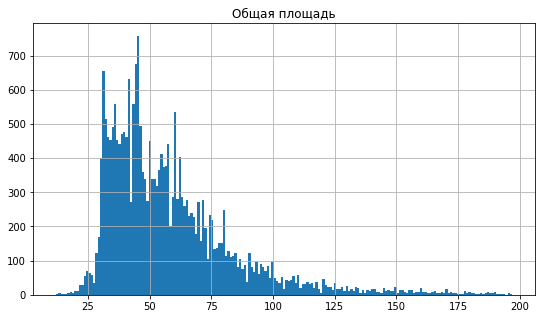

In [12]:
data['total_area'].hist(bins=197, figsize = (9,5))
display(data['total_area'].describe())
plt.title('Общая площадь')
plt.show()

Больше всего объявлений с общей площадью от 40 до 70 квадратных метров.

<AxesSubplot:>

count    21572.000000
mean        33.130840
std         16.885747
min          8.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        120.000000
Name: living_area, dtype: float64

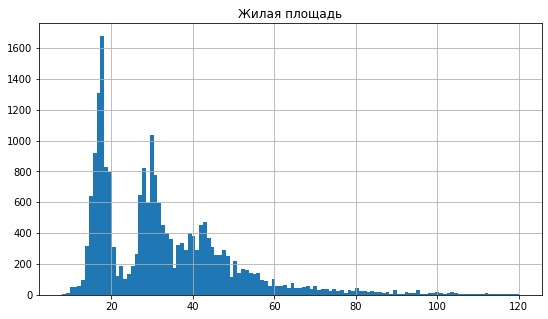

In [13]:
display(data['living_area'].hist(bins=120, figsize = (9,5)))
display(data['living_area'].describe())
plt.title('Жилая площадь')
plt.show()

Пиковые значения находятся диапазоне около 18 и 30 квадратных метров.

count    21421.00
mean        10.57
std          5.91
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

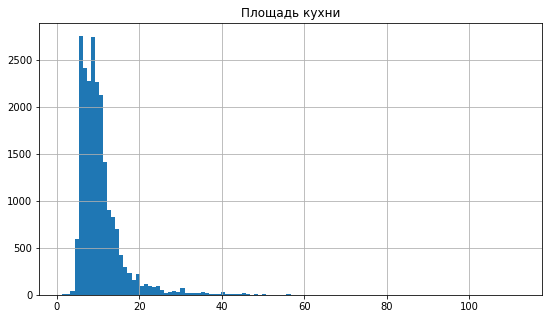

In [14]:
data['kitchen_area'].hist(bins=112, figsize = (9,5))
display(data['kitchen_area'].describe().round(2))
plt.title('Площадь кухни')
plt.show()

Самая большая кухня имеет площадь 112 квадратных метров. Самая маленькая - менее 1,5 квадратного метра. Чаще всего кухня имеет площадь приблизительно от 7 до 12 квадратных метров, таких объявлений больше всего.

count    22517.00
mean         5.17
std          2.73
min          0.01
25%          3.37
50%          4.50
75%          6.30
max         15.30
Name: last_price, dtype: float64

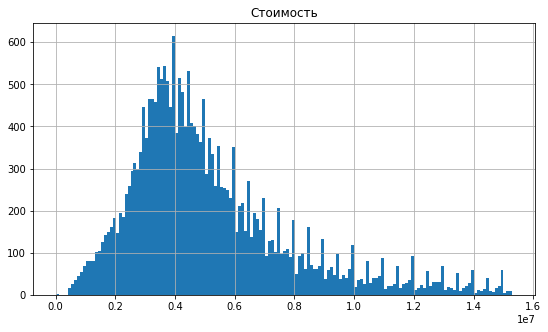

In [15]:
last_price = data['last_price']/1000000 
display(last_price.describe().round(2))
data['last_price'].hist(bins=153, figsize = (9,5))
plt.title('Стоимость')
plt.show()

Пиковые значения расположены от 3,37 млн до 6,3 млн. Средняя стоимость квартиры приблизительно 5,17 млн.  

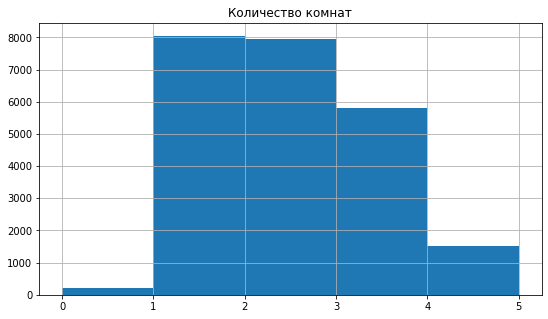

In [16]:
data.hist('rooms', bins=5, figsize = (9,5))
data['rooms'].describe()
plt.title('Количество комнат')
plt.show()

Пиковые значения показывают объявления с 1, 2 и 3 комнатами.

count    23678.000000
mean         2.700962
std          0.304917
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max         22.600000
Name: ceiling_height, dtype: float64

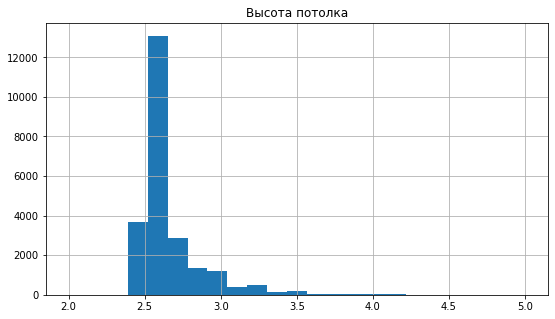

In [17]:
data.hist('ceiling_height', bins=23, range=(2,5), figsize = (9,5))
display(data['ceiling_height'].describe())
plt.title('Высота потолка')
plt.show()

Средняя высота потолка примерно 2,7 метра, таких данных больше всего - 75% от всех объявлений.

2    3368
3    3073
1    2917
4    2804
5    2621
6    1305
7    1218
8    1083
9    1051
Name: floor, dtype: int64

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

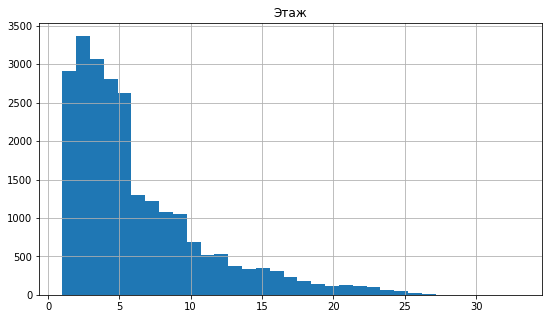

In [18]:
data.hist('floor', bins=33, figsize = (9,5))
display(data['floor'].value_counts().head(9))
display(data['floor'].describe())
plt.title('Этаж')
plt.show()

Пиковые значения показывают объявления с квартирами, расположенными с 1-го по 5-й этажи. А три четверти квартир из объявлений расположены с 1-го по 8-й этажи. 

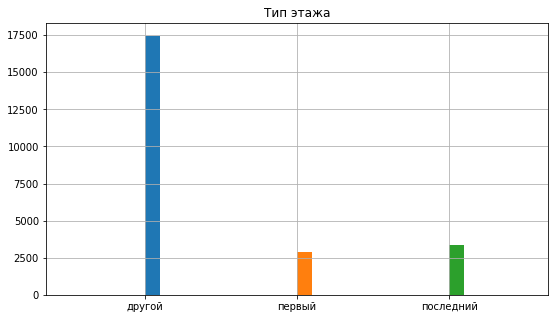

In [19]:
data.groupby('floor_type')['floor_type'].hist(figsize = (9,5))
data.groupby('floor_type')['floor_type'].describe()
plt.title('Тип этажа')
plt.show()

Объявлений с первым и последним этажом существенно меньше, что логично.

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

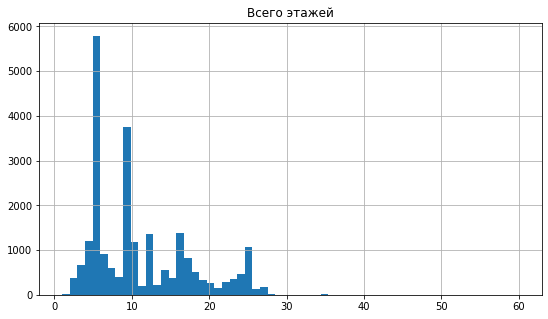

In [20]:
data.hist('floors_total', bins=60, figsize = (9,5))
display(data['floors_total'].describe())
plt.title('Всего этажей')
plt.show()

Квартир, находящихся в 5-ти и 9-ти этажных домах больше всего в объявлениях. Логично предположить, что в Санкт-Петербурге много 5-ти и 9-ти этажных домов. Максимальная этажность здания в объявлениях - 60.

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

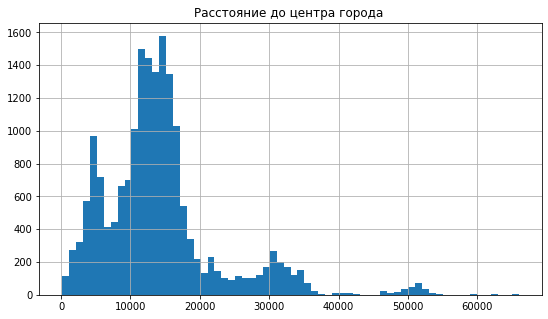

In [21]:
data.hist('city_сenters_nearest', bins=66, figsize = (9,5))
display(data['city_сenters_nearest'].describe())
plt.title('Расстояние до центра города ')
plt.show()

Основные значения показывают объявления о продаже квартир, находящихся в 9-16 км от центра. Максимальная удалённость от центра почти 66 км.

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

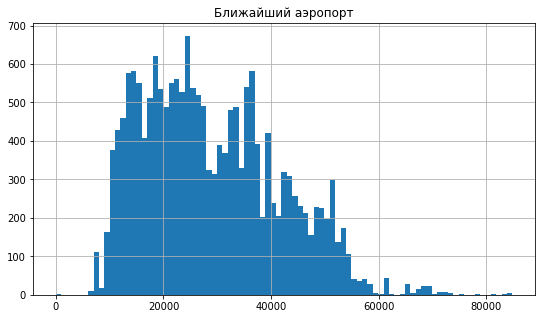

In [22]:
data.hist('airports_nearest', bins=85, figsize = (9,5))
display(data['airports_nearest'].describe())
plt.title('Ближайший аэропорт')
plt.show()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

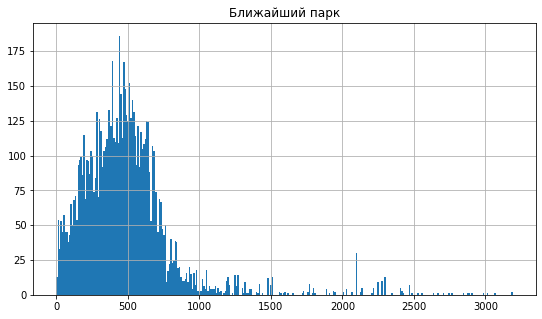

In [23]:
data.hist('parks_nearest', bins=320, figsize = (9,5))
display(data['parks_nearest'].describe())
plt.title('Ближайший парк')
plt.show()

В Санкт-Петербурге достаточно много парков. В среднем расстояние до парка 500 метров. Максимальное значение расстояния до парка  - всего 3190 метров.

<AxesSubplot:xlabel='month_exposition'>

month_exposition
May          1274
January      1500
December     1641
July         1695
August       1744
June         1760
September    1981
October      2127
November     2371
April        2379
March        2587
February     2640
Name: month_exposition, dtype: int64

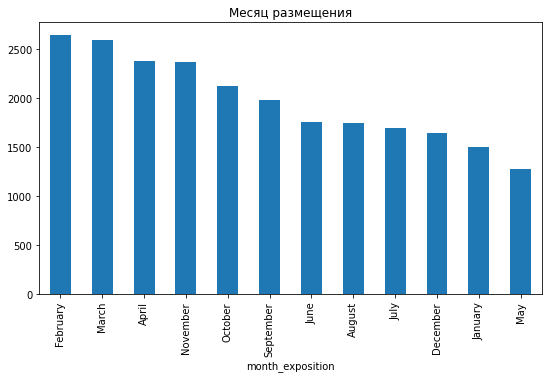

In [24]:
display(data.groupby('month_exposition')['month_exposition'].count().sort_values(ascending=False).plot.bar(figsize = (9,5)))
display(data.groupby('month_exposition')['month_exposition'].count().sort_values())
plt.title('Месяц размещения')
plt.show()


Больше всего размещено объявлений с февраля по апрель. Активность можно увидеть с сентября по ноябрь. Меньше всего объявлений было с конца весны до начала осени. А также перед и после нового года. Такое положение дел в данных логично – ближе к лету сезон отпусков, так называемый дачный сезон, заканчивается учёба. Осенью рационально заняться недвижимостью до нового года. После нового года есть время до наступления тепла.

day_of_week_exposition
3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: day_of_week_exposition, dtype: int64

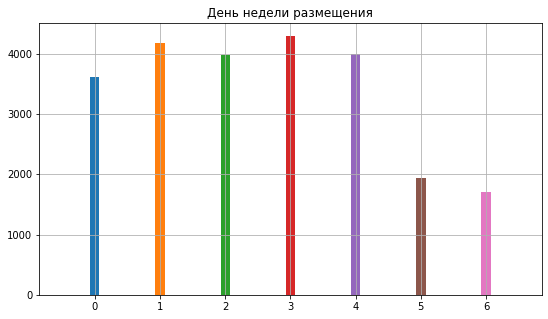

In [25]:
data.groupby('day_of_week_exposition')['day_of_week_exposition'].hist(bins=7, figsize = (9,5))
display(data.groupby('day_of_week_exposition')['day_of_week_exposition'].count().sort_values(ascending=False))
plt.title('День недели размещения')
plt.show()

Самые высокие значения у четверга и вторника. В целом, можно сказать, что активность начинается с понедельника и заканчивается в пятницу. В субботу и воскресенье активность примерно в два раза меньше.

# Изучим, как быстро продавались квартиры.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
Name: days_exposition, dtype: int64

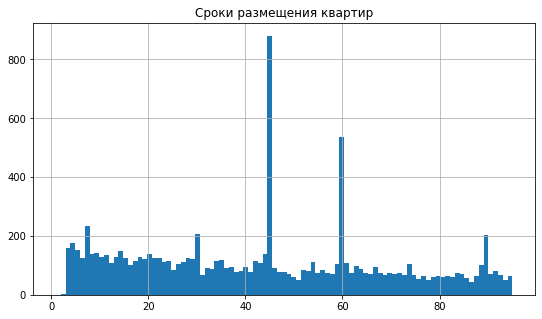

In [26]:
display(data['days_exposition'].describe())
display(data['days_exposition'].value_counts().head())
data_days_exposition = data.loc[data['days_exposition'] <=95, 'days_exposition']
data_days_exposition.hist(bins=95, figsize = (9,5))
plt.title('Сроки размещения квартир')
plt.show()

В среднем одно объявление было размещено почти 181 день - это буквально пол года. Можно предположить, что это связано с тем, что по условиям сервиса Яндекс Недвижимость, раз в полгода можно разместить одно или два бесплатных объявления. Это определяет жизненный цикл бесплатного объявления. Но при этом максимальное количество дней размещения было 1580, что, в свою очередь, можно объяснить условиями размещения платных объявлений: на 31-й день платного размещения включится автопродление и, вероятно, таким образом был достигнут максимум. Медианное значение почти в два раза меньше среднего, всего 95. 25% объявлений были размещены до 45 дней. 75% объявлений были размещены до 232 дней. Исходя из этих данных, можно сказать, что чаще всего продажа происходит в этот период. Быстрыми можно считать продажи в срок до 45 дней. Долгими - более 232 дней. На графике видны циклично повторяющиеся пики, это значения 7, 30, 45, 60, и 90. Можно предположить, что это тоже связано с условиями размещения объявлений. Сейчас сроки размещения объявлений сервиса Яндекс Недвижимость о продаже квартир в городе Санкт-Петербурге - 120 и 30 дней. Но в период, когда данные попали в архив, условия могли быть другими. Больше всего объявлений было снято по истечении 45 дней.

# Разберёмся какие факторы больше всего влияют на общую стоимость квартиры

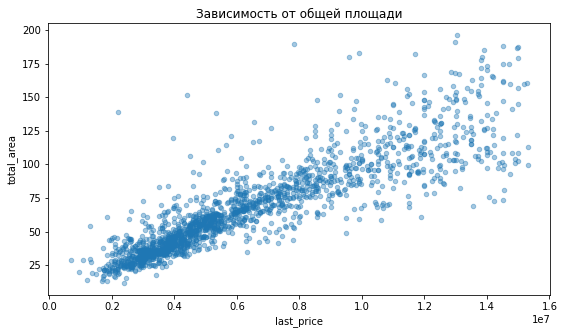

In [27]:
data_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()
data_total_area.plot(x='last_price', y='total_area', kind='scatter', alpha=0.4,  figsize = (9,5), title='Зависимость от общей площади')
data_total_area['last_price'].corr(data_total_area['total_area']).round(decimals=2)
plt.show()

Общая площадь сильно влияет на стоимость, это показывает график и высокая величина коэффицента корреляции 0.88.

0.82

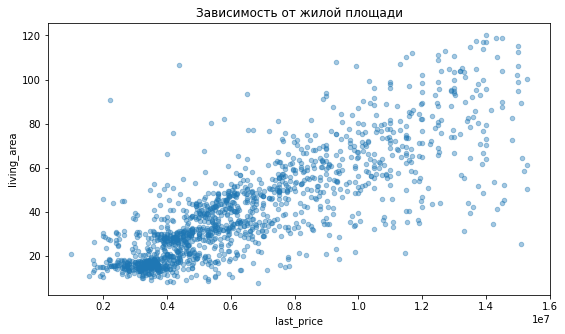

In [28]:
data_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()
data_living_area.plot(x='last_price', y='living_area', kind='scatter', alpha=0.4,  figsize = (9,5), title='Зависимость от жилой площади')
data_living_area['last_price'].corr(data_living_area['living_area']).round(decimals=2)

Величина коэффицента корреляции немного ниже, чем у общей площади 0.82, но достаточна высока. Больше жилая площадь - выше цена.

0.64

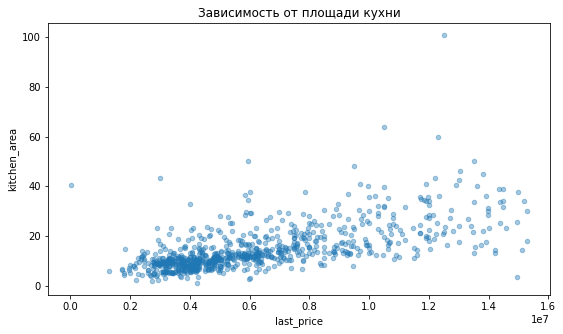

In [29]:
data_kitchen = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()
data_kitchen.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.4,  figsize=(9,5), title='Зависимость от площади кухни')
data_kitchen['last_price'].corr(data_kitchen['kitchen_area']).round(decimals=2)

Площадь кухни влияет на стоимость квартиры. Характеристика силы связи средняя, меньше, чем от общей и жилой площади 0.64.

0.97

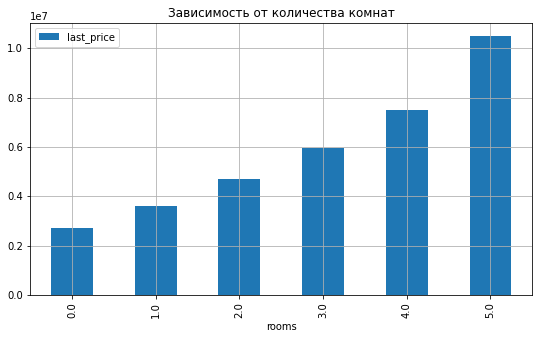

In [30]:
data_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()
data_rooms.plot(kind='bar', x='rooms', y='last_price', figsize=(9,5), grid=True, title='Зависимость от количества комнат')
data_rooms['last_price'].corr(data_rooms['rooms']).round(decimals=2)

Величина коэффицента корреляции количества комнат и стоимости близка к масимальной - 0.97. Связь очень сильная.

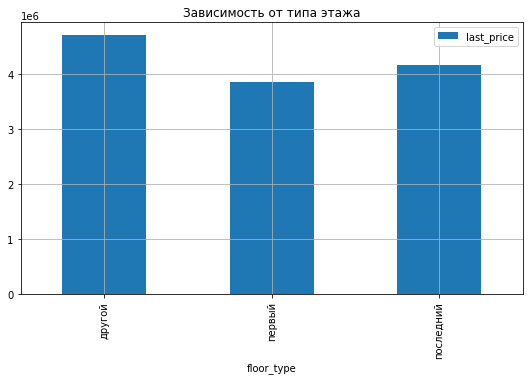

In [31]:
data_floor = data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
data_floor.plot(kind='bar', x='floor_type', y='last_price', figsize=(9,5), grid=True, title='Зависимость от типа этажа')
plt.show()

Квартиры стоят дороже, если они расположены не на первом и не на последнем этажах. Самая низкая стоимость у квартир на первом этаже.

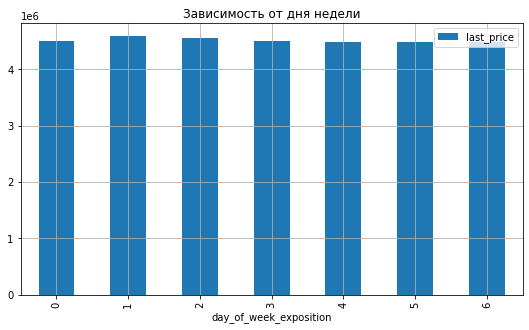

In [32]:
data_day = data.pivot_table(index='day_of_week_exposition', values='last_price', aggfunc='median').reset_index()
data_day.plot(kind='bar', x='day_of_week_exposition', y='last_price', figsize=(9,5), grid=True, title='Зависимость от дня недели')
plt.show()


Очевидную зависимость стоимости квартиры от дня недели публикации объявления увидеть сложно.

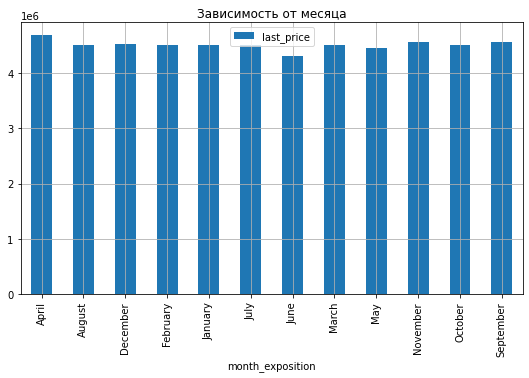

In [33]:
data_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').reset_index()
data_month.plot(kind='bar', x='month_exposition', y='last_price', figsize=(9,5), grid=True, title='Зависимость от месяца')
plt.show()

Месяц публикации объявления практически не влияет на стоимости квартиры.

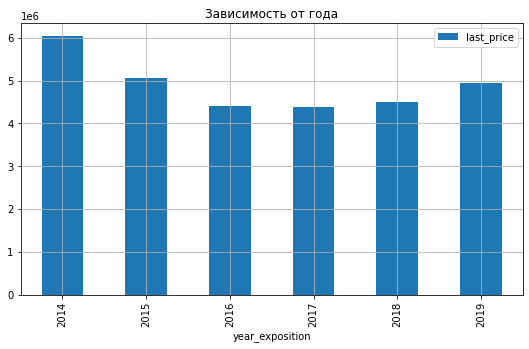

In [34]:
data_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').reset_index()
data_year.plot(kind='bar', x='year_exposition', y='last_price', figsize=(9,5), grid=True, title='Зависимость от года')
plt.show()

От года определённо есть зависимость. В каждом году квартиры продавалтсь по-разному.

# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

,locality_name,count,mean
33,Санкт-Петербург,14570,107333.99
219,поселок Мурино,556,85681.76
295,поселок Шушары,440,78677.36
3,Всеволожск,397,67214.25
32,Пушкин,351,101197.27
13,Колпино,337,75333.30
230,поселок Парголово,326,90332.26
6,Гатчина,307,68746.15
79,деревня Кудрово,299,92473.55
4,Выборг,236,57932.88


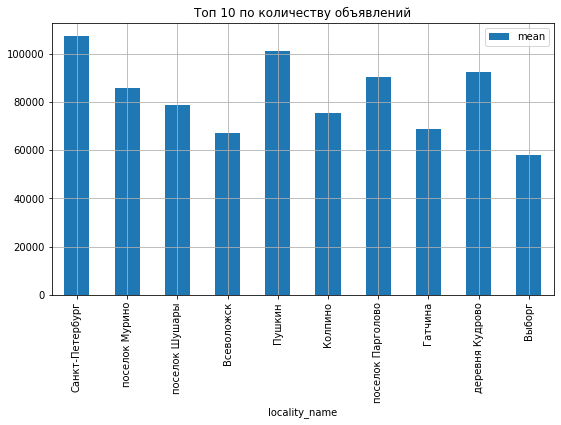

In [35]:
data_top = data.pivot_table(index='locality_name', values='m_price', aggfunc=['count','mean']).reset_index().round(decimals=2)
data_top = data_top.droplevel(1, axis=1)
data_top = data_top.sort_values(by='count', ascending=False).head(10)
display(data_top)
data_top.plot(kind='bar', x='locality_name', y='mean', figsize=(9,5), grid=True, title='Топ 10 по количеству объявлений')
plt.show()

Больше всего объявлений в Санкт-Петербурге. Цена одного квадратного метра в среднем 107306.96 -  это выше, чем во всех остальных населённых пунктах. На втором месте - город Пушкин. Самая низкая стоимость одного квадратного метра в городе Выборг - 57932.88 

# Вычислим среднюю цену каждого километра расстояния до центра города.

,city_сenters_nearest_km,mean
29,29.0,72953.37
28,28.0,81161.91
27,27.0,132115.71
26,26.0,89285.88
25,25.0,91531.37
24,24.0,85736.90
23,23.0,92063.68
22,22.0,91188.59
21,21.0,94469.58
20,20.0,103045.18


,locality_name,first_day_exposition,last_price,m_price,total_area,living_area,rooms,kitchen_area,balcony,ceiling_height,floors_total,floor_type,floor,is_apartment,studio,open_plan,airports_nearest,city_сenters_nearest,city_сenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,month_exposition,year_exposition,day_of_week_exposition,total_images
748,Санкт-Петербург,2017-11-28,14350000.0,193918.92,74.00,30.00,2.0,25.0,0,3.13,5.0,другой,3,0,False,False,23888.0,27313.0,27.0,1.0,1496.0,0.0,NaN,128.0,November,2017,1,13
2948,Пушкин,2017-08-15,11350000.0,151333.33,75.00,52.70,3.0,8.7,4.0,3.50,2.0,последний,2,0,False,False,15337.0,27490.0,27.0,3.0,216.0,3.0,153.0,207.0,August,2017,1,23
4400,Пушкин,2017-09-09,12300000.0,156389.07,78.65,48.00,3.0,11.0,0.0,2.65,5.0,первый,1,0,False,False,14567.0,26720.0,27.0,2.0,403.0,0.0,NaN,4.0,September,2017,5,4
7295,Пушкин,2017-07-06,7950000.0,159000.00,50.00,23.00,1.0,23.0,0,3.00,6.0,другой,4,0,False,False,14387.0,26540.0,27.0,0.0,NaN,0.0,NaN,201.0,July,2017,3,14
10162,Пушкин,2017-10-01,8000000.0,140869.87,56.79,32.08,2.0,NaN,0.0,2.65,5.0,последний,5,0,False,False,14517.0,26670.0,27.0,1.0,517.0,0.0,NaN,4.0,October,2017,6,11
12466,Пушкин,2017-01-31,15000000.0,167410.71,89.60,57.00,3.0,13.5,0,2.65,3.0,последний,3,0,False,False,15065.0,27218.0,27.0,3.0,317.0,3.0,509.0,357.0,January,2017,1,11
21092,Пушкин,2018-08-01,9300000.0,132857.14,70.00,39.70,2.0,10.2,0,2.90,4.0,другой,3,0,False,False,14372.0,26525.0,27.0,1.0,668.0,0.0,NaN,NaN,August,2018,2,10
21680,Пушкин,2016-02-12,9300000.0,145312.50,64.00,38.00,2.0,12.0,0,3.00,6.0,другой,2,False,False,False,14691.0,26845.0,27.0,0.0,NaN,0.0,NaN,983.0,February,2016,4,9


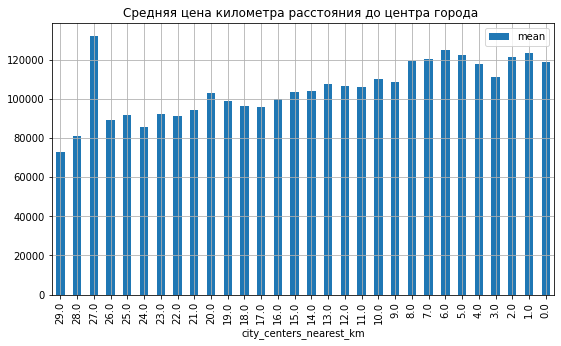

In [36]:
data_price_km = data.query('locality_name=="Санкт-Петербург"').sort_values(by='city_сenters_nearest_km', ascending=True)
data_price_km = data_price_km.pivot_table(
    index='city_сenters_nearest_km', values='m_price', aggfunc=['mean']).reset_index().round(decimals=2)
data_price_km = data_price_km.droplevel(1, axis=1).sort_values(by='city_сenters_nearest_km', ascending=False)
display(data_price_km)
data_price_km.plot(
    kind='bar', x='city_сenters_nearest_km', y='mean', figsize=(9,5), 
    grid=True, title='Средняя цена километра расстояния до центра города ')
display(data.query('city_сenters_nearest_km==27 & m_price>=130000'))


По мере приближения к городу цена за квадратный метр увеличивается. На 27-ом километре можно увидеть выбивающееся из общей картины значение - здесь средняя стоимость квадратного метра достигает 132115. Если отфильтровать объявления по этим данным, то мы увидим достаточно много объявлений в городе Пушкин. Можно предположить, что не все пользователи указывали точные данные о локации. Тот факт, что Пушкинский район – административно-территориальная единица Санкт‑Петербурга, подтверждает предположение - формально это часть города. В остальном распределение средней стоимости квадратного метра выглядит более менее равномерно. Судя по графику, центр грорда заканчивается примерно после 8 км.

### Общий вывод

Было проведено исследование, чтобы выявить интересные особенности и зависимости, которые существуют на рынке недвижимости. Входные данные - архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

- В результате удалось выявить некоторые особенности данных.

Распределение цен на рынке недвижимости в Санкт-Петербурге очень неравномерное. Максимальная общая стоимость квартиры достигает 763 млн, в то время как основное количество объявлений расположено в ценовом диапазоне от 3,4 млн до 6,8 млн.  Неравномерное распределение значений имеет и площадь квартир в объявлениях.
Самыми «ходовыми» в продаже являются квартиры с жилой площадью примерно 20 – 40 квадратных метров.
Кухня в среднем имеет площадь около 10 квадратных метров.
Больше всего квартир с 1-й и 2-мя комнатами.
Стандартная высота потолка около 2,7 м.
Больше всего объявлений квартир в 9-ти и 5-ти этажных домах, наиболее популярны в продаже квартиры с 1-го по 5-й этажи.
Расстояние до центра города чаще всего от 9 до 16 км. До аэропорта в среднем 18-37 км. До ближайшего парка - до 3 км. 

- Есть некоторые зависимости относительно дат размещения объявлений.

С конца весны до начала осени было размещено меньше всего объявлений. С сентября по ноябрь активность повышается. Больше всего объявлений размещается с февраля по апрель. 
По дням недели зависимость следующая: активность начинается с понедельника и заканчивается в пятницу. В субботу и воскресенье активность примерно в два раза меньше.

- как быстро продавались квартиры

Как быстро продавались квартиры мы можем судить по длительности размещения объявлений. 25% объявлений были размещены до 45 дней. 75% объявлений были размещены до 232 дней. Быстрыми можно считать продажи в срок до 45 дней. Обычными - от 45 до 232. Долгими - более 232 дней. Большую роль играют условия размещения сервиса Яндекс Недвижимость, у платных и бесплатных объявлений разные условия по срокам размещения. Для более точного исследования нужно больше данных.

- какие факторы больше всего влияют на общую стоимость квартиры

Сильное влияние на общую стоимость квартиры оказывает фактор площади. Величина коэффициента корреляции по количеству комнат 0,97.  Величина коэффициента корреляции по общей и жилой площади - более 0,8. Площадь кухни имеет менее выраженное влияние, но достаточно очевидное: величина коэффициента корреляции 0.64. Чем больше комнат – тем больше площадь, чем больше площадь – тем выше цена.  
Влияние оказывает и этаж. Самая низкая стоимость у квартир на первом этаже. Квартиры стоят дороже, если они расположены не на первом и не на последнем этажах.
По имеющимся данным, существенное влияние оказал год продажи. С 2015 года заметно явное снижение стоимости. Так продолжалось до 2017 года, пока цены вновь не начали расти. Можно предположить, что это связано с Валютным кризисом в России (2014—2015) и прочими внешними факторами.

- средняя цена одного квадратного метра и наибольшее число объявлений

Наибольшее количество объявлений имеет город Санкт-Петербург. Но нам уже известно, что в эту локацию могут входить и объявления из соседних населённых пунктов, формально считающиеся городом. Поэтому для более точного исследования нужно больше данных о локациях. Цена одного квадратного метра в Санкт-Петербурге в среднем около 110 тысяч.

- цену каждого километра расстояния до центра города

По имеющимся данным, распределение средней стоимости квадратного метра выглядит более-менее равномерно. Примерно 120 тысяч за квадратный метр снижается приблизительно до 70 тысяч по мере удалённости от центра в пределах 30 км. На 27-ом километре удалённости от центра квадратный метр существенно увеличивается в цене, предположительно это город Пушкин. Для более точного исследования нужно больше данных о локациях.
